This Python script compares PLDDT (per-residue confidence) values from PDB files located in two directories (folder1 and folder2). The script performs the following steps:Filename Matching:

Extracts a specific string (characters 6–10) from filenames in both directories to identify corresponding files for comparison.
PLDDT Extraction:

Reads PLDDT values stored in the B-factor field of PDB files using the Bio.PDB module.
Histogram Comparison:

Plots histograms of PLDDT values for the corresponding files from the two directories, overlaying the data for comparison.
Output Graphs:

Saves the generated histograms as PNG files in a specified output_folder.


In [ ]:
import os
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser

# Define the two directories
folder1 = r"D:\Research\Part 1 - Comparison\Comparison\E.Coli\AF 2 Prediction\AF2"
folder2 = r"D:\Research\Part 1 - Comparison\Comparison\E.Coli\AF 3 Prediction\AF3"
output_folder = r"D:\Research\Part 1 - Comparison\Graph Output"  # Output directory for graphs

# Function to extract relevant part of filename (assuming the important string is 6-10 characters long)
def extract_relevant_string(filename):
    return filename[6:10].lower()  # Lowercase for case insensitivity

# Function to load PLDDT values from a PDB file
def load_plddt_values_from_pdb(filepath):
    p = PDBParser()
    structure = p.get_structure('PDB_structure', filepath)

    # Assuming PLDDT values are stored in the B-factor field of the PDB file
    plddt_values = []
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    plddt_values.append(atom.bfactor)  # B-factor (PLDDT score)

    return plddt_values

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Get list of files in both directories
files1 = os.listdir(folder1)
files2 = os.listdir(folder2)

# Create a dictionary to store PLDDT values for comparison
plddt_data = {}

# Compare files between the two directories based on the relevant string in filenames
for file1 in files1:
    relevant_str1 = extract_relevant_string(file1)
    for file2 in files2:
        relevant_str2 = extract_relevant_string(file2)
        if relevant_str1 == relevant_str2:
            # Load PLDDT values for both files
            filepath1 = os.path.join(folder1, file1)
            filepath2 = os.path.join(folder2, file2)
            try:
                plddt1 = load_plddt_values_from_pdb(filepath1)
                plddt2 = load_plddt_values_from_pdb(filepath2)

                # Store the values in a dictionary for histogram plotting
                plddt_data[relevant_str1] = (plddt1, plddt2)
            except Exception as e:
                print(f"Error processing files {file1} and {file2}: {e}")
            break  # Stop after finding the match

# Plot histograms of PLDDT values and save the graphs
for key, (plddt1, plddt2) in plddt_data.items():
    plt.figure()
    plt.hist(plddt1, bins=50, alpha=0.5, label='AF 3 Prediction')
    plt.hist(plddt2, bins=50, alpha=0.5, label='AF 2 Prediction')
    plt.title('Ecoli')
    plt.xlabel('PLDDT Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

    # Save the plot to the output folder
    output_path = os.path.join(output_folder, f'Ecoli{key}.png')
    plt.savefig(output_path)
    plt.close()  # Close the plot to avoid displaying it interactively


In [ ]:
import os
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
import numpy as np

# Define the two directories
folder1 = r"D:\Research\Part 1 - Comparison\Comparison\E.Coli\AF 2 Prediction\AF2"
folder2 = r"D:\Research\Part 1 - Comparison\Comparison\E.Coli\AF 3 Prediction\AF3"
output_folder = r"D:\Research\Part 1 - Comparison\Graph Output"  # Output directory for graphs

# Function to extract relevant part of filename (assuming the important string is 6-10 characters long)
def extract_relevant_string(filename):
    return filename[6:10].lower()  # Lowercase for case insensitivity

# Function to load PLDDT values from a PDB file
def load_plddt_values_from_pdb(filepath):
    p = PDBParser()
    structure = p.get_structure('PDB_structure', filepath)

    # Assuming PLDDT values are stored in the B-factor field of the PDB file
    plddt_values = []
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    plddt_values.append(atom.bfactor)  # B-factor (PLDDT score)

    return plddt_values

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Get list of files in both directories
files1 = os.listdir(folder1)
files2 = os.listdir(folder2)

# Create a dictionary to store PLDDT values for comparison
plddt_data = {}

# Compare files between the two directories based on the relevant string in filenames
for file1 in files1:
    relevant_str1 = extract_relevant_string(file1)
    for file2 in files2:
        relevant_str2 = extract_relevant_string(file2)
        if relevant_str1 == relevant_str2:
            # Load PLDDT values for both files
            filepath1 = os.path.join(folder1, file1)
            filepath2 = os.path.join(folder2, file2)
            try:
                plddt1 = load_plddt_values_from_pdb(filepath1)
                plddt2 = load_plddt_values_from_pdb(filepath2)

                # Store the average PLDDT values for direct comparison
                avg_plddt1 = sum(plddt1) / len(plddt1) if len(plddt1) > 0 else 0
                avg_plddt2 = sum(plddt2) / len(plddt2) if len(plddt2) > 0 else 0
                plddt_data[relevant_str1] = (avg_plddt1, avg_plddt2)
            except Exception as e:
                print(f"Error processing files {file1} and {file2}: {e}")
            break  # Stop after finding the match

# Limit to 40 comparisons (80 bars total: 40 AF 3 + 40 AF 2)
if len(plddt_data) > 40:
    plddt_data = dict(list(plddt_data.items())[:40])

# Prepare data for overall comparison
af3_total = []
af2_total = []

for avg_plddt1, avg_plddt2 in plddt_data.values():
    af3_total.append(avg_plddt1)
    af2_total.append(avg_plddt2)

# Calculate overall averages
af3_avg = sum(af3_total) / len(af3_total) if len(af3_total) > 0 else 0
af2_avg = sum(af2_total) / len(af2_total) if len(af2_total) > 0 else 0

# Create the figure for the comparison bar graph (2 bars: AF3 and AF2)
plt.figure(figsize=(10, 6))  # Set figure size

# Bar graph data
labels = ['AF 3 Prediction', 'AF 2 Prediction']
avg_values = [af3_avg, af2_avg]

# Plot bar graph
plt.bar(labels, avg_values, color=['blue', 'orange'], edgecolor='black')

# Set labels and title
plt.title('E.coli Comparison of Average PLDDT Values (AF 3 vs AF 2)')
plt.ylabel('Average PLDDT Value')

# Save the plot to the output folder
output_path = os.path.join(output_folder, 'Ecoli_comparison_average_plddt.png')
plt.savefig(output_path)
plt.close()  # Close the plot to avoid displaying it interactively



Files in Folder1: ['P00960.pdb', 'P03024.pdb', 'P04993.pdb', 'P07004.pdb', 'P08191.pdb', 'P09373.pdb', 'P09557.pdb', 'P0A6W9.pdb', 'P0A8M6.pdb', 'P0A8X4.pdb', 'P0A9I5.pdb', 'P0AA10.pdb', 'P0AC38.pdb', 'P0AC62.pdb', 'P0ACC3.pdb', 'P0AD19.pdb', 'P0AE30.pdb', 'P0AFG0.pdb', 'P0AGA6.pdb', 'P19767.pdb', 'P23842.pdb', 'P24215.pdb', 'P25552.pdb', 'P27242.pdb', 'P28303.pdb', 'P31224.pdb', 'P31663.pdb', 'P32056.pdb', 'P33221.pdb', 'P33234.pdb', 'P33368.pdb', 'P37349.pdb', 'P38135.pdb', 'P39196.pdb', 'P46889.pdb', 'P64610.pdb', 'P75747.pdb', 'P75791.pdb', 'P76046.pdb', 'P77736.pdb']
Files in Folder2: ['p00960.pdb', 'p03024.pdb', 'p04993.pdb', 'p07004.pdb', 'p08191.pdb', 'p09373.pdb', 'p09557.pdb', 'p0a6w9.pdb', 'p0a8m6.pdb', 'p0a8x4.pdb', 'p0a9i5.pdb', 'p0aa10.pdb', 'p0ac38.pdb', 'p0acc3.pdb', 'p0ad19.pdb', 'p0ae30.pdb', 'p0afg0.pdb', 'p0aga6.pdb', 'p19767.pdb', 'p23842.pdb', 'p24215.pdb', 'p25552.pdb', 'p27242.pdb', 'p28303.pdb', 'p31224.pdb', 'p31663.pdb', 'p32056.pdb', 'p33221.pdb', 'p33234.pd

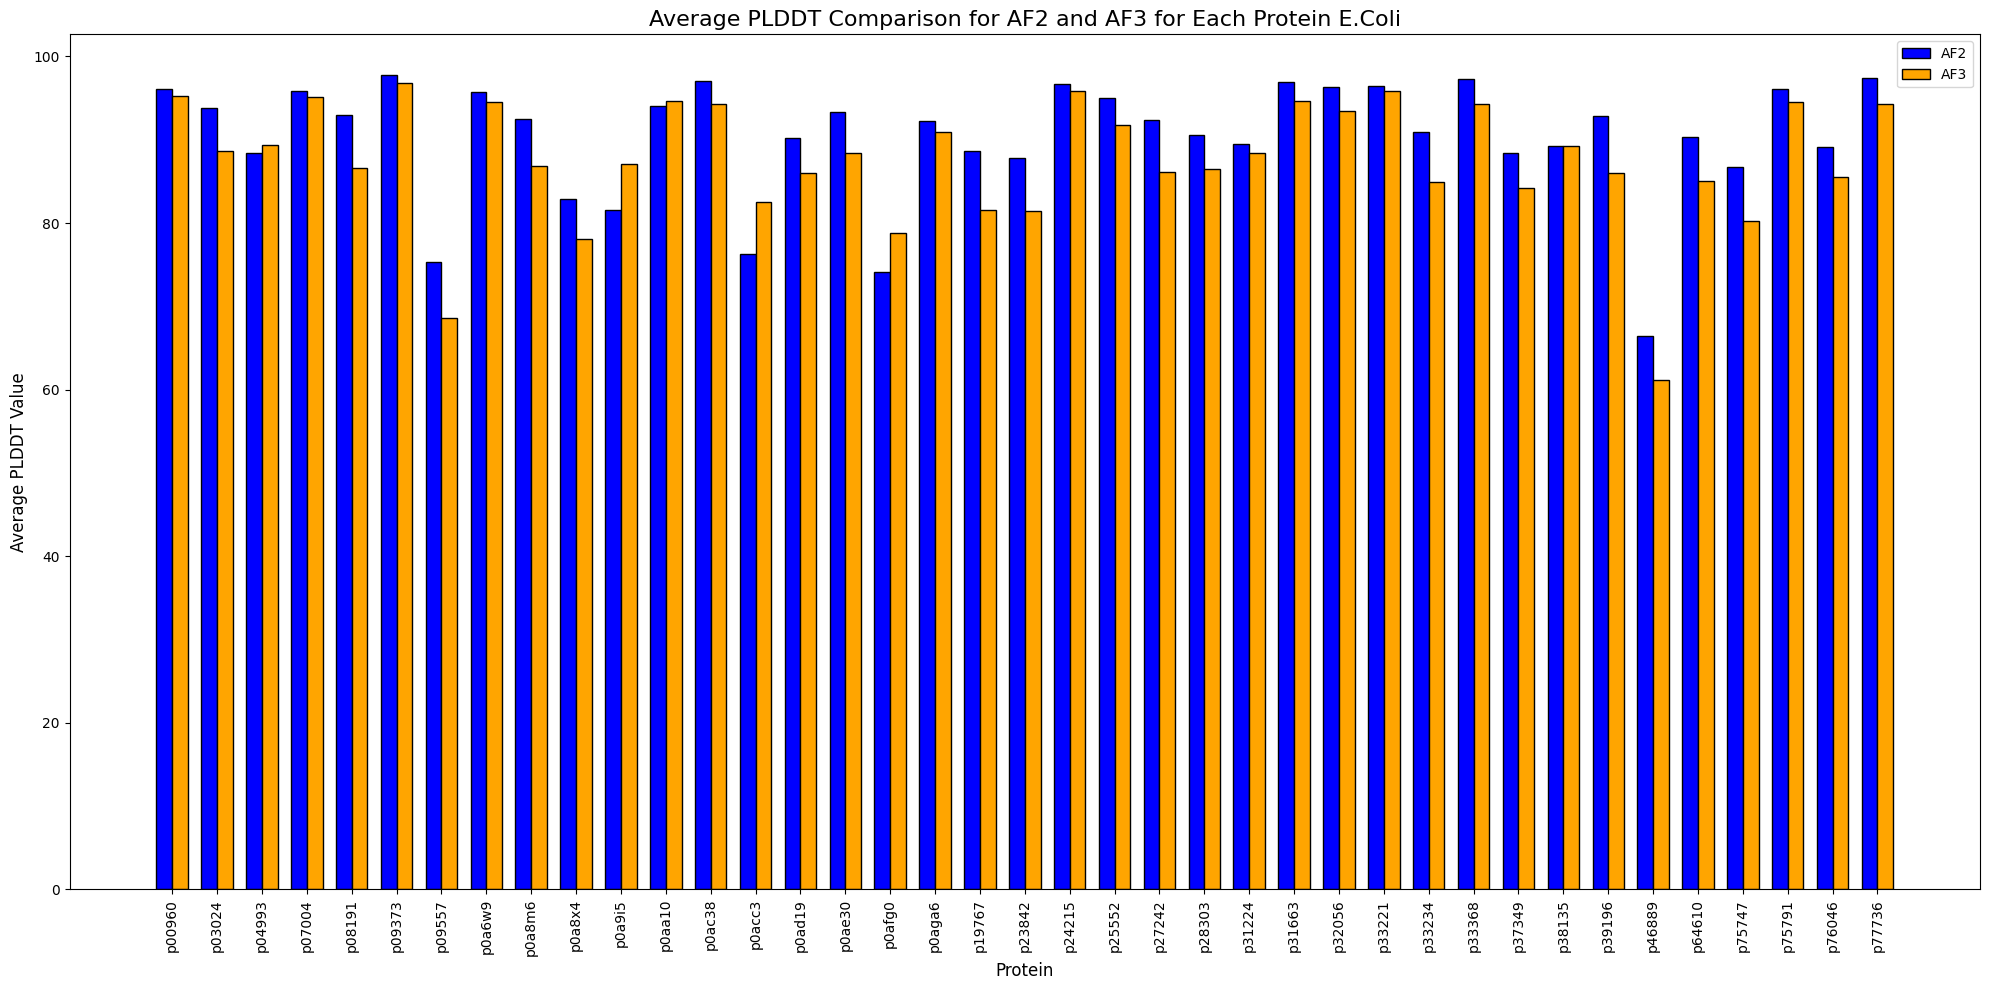

In [ ]:
import os
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
import numpy as np

# Define directories
folder1 = r"D:\Research\Part 1 - Comparison\Comparison\E.Coli\AF 2 Prediction\AF2"
folder2 = r"D:\Research\Part 1 - Comparison\Comparison\E.Coli\AF 3 Prediction\AF3"
output_folder = r"D:\Research\Part 1 - Comparison\Graph Output"

# Extract relevant string (protein ID)
def extract_relevant_string(filename):
    return filename.split('.')[0].lower()  # Extract portion before `.pdb`

# Load PLDDT values
def load_plddt_values_from_pdb(filepath):
    p = PDBParser(QUIET=True)
    structure = p.get_structure('PDB_structure', filepath)
    plddt_values = []
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    plddt_values.append(atom.bfactor)
    return plddt_values

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# List files in folders
files1 = os.listdir(folder1)
files2 = os.listdir(folder2)

# Debugging: Check files and identifiers
print("Files in Folder1:", files1)
print("Files in Folder2:", files2)

# Collect PLDDT data
plddt_data = {}

for file1 in files1:
    id1 = extract_relevant_string(file1)
    for file2 in files2:
        id2 = extract_relevant_string(file2)
        print(f"Matching {file1} ({id1}) with {file2} ({id2})")  # Debug matching
        if id1 == id2:
            try:
                plddt1 = load_plddt_values_from_pdb(os.path.join(folder1, file1))
                plddt2 = load_plddt_values_from_pdb(os.path.join(folder2, file2))
                avg_plddt1 = sum(plddt1) / len(plddt1) if plddt1 else 0
                avg_plddt2 = sum(plddt2) / len(plddt2) if plddt2 else 0
                plddt_data[id1] = (avg_plddt1, avg_plddt2)
            except Exception as e:
                print(f"Error processing {file1} and {file2}: {e}")
            break

# Debugging: Print collected data
print("PLDDT Data:", plddt_data)

# Limit to 40 comparisons
if len(plddt_data) > 40:
    plddt_data = dict(list(plddt_data.items())[:40])

if not plddt_data:
    print("No matching data found. Exiting.")
    exit()

# Prepare for plotting
proteins = list(plddt_data.keys())
af2_values = [x[0] for x in plddt_data.values()]
af3_values = [x[1] for x in plddt_data.values()]

# Plot grouped bar chart
bar_width = 0.35
index = np.arange(len(proteins))

plt.figure(figsize=(20, 10))
plt.bar(index, af2_values, bar_width, label='AF2', color='blue', edgecolor='black')
plt.bar(index + bar_width, af3_values, bar_width, label='AF3', color='orange', edgecolor='black')

# Add labels and title
plt.xlabel('Protein', fontsize=12)
plt.ylabel('Average PLDDT Value', fontsize=12)
plt.title('Average PLDDT Comparison for AF2 and AF3 for Each Protein E.Coli', fontsize=16)
plt.xticks(index + bar_width / 2, proteins, rotation=90)
plt.legend()

# Save and display
plt.tight_layout()
output_path = os.path.join(output_folder, 'PLDDT_Comparison_40_Proteins.png')
plt.savefig(output_path)
plt.show()
